theta:3.14
phi:3.14
final result::
theta: 0.00016836093664307494, phi: 3.1415924639103716


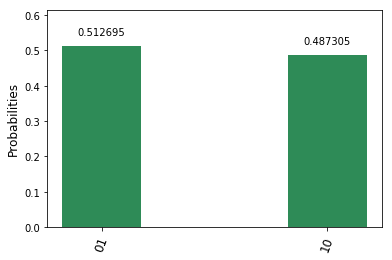

In [2]:
"""Circuit results definite 01 and 10 output state is one of the Bell basis circuit
   The basic ingrediants of a Bell basis circuit are
   1. Hadamard (H) gate at control qubit
   2. CNOT from control to target qubit
   It is 2-qubit circuit
   Each qubit will be represented by unkown 'theta' and 'phi' rotattion on Ry gate
   'theta and 'phi' will be optimally found out by Gradient descent"""

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import plot_bloch_vector, plot_histogram
from matplotlib import pyplot
from qiskit import execute
import math
from math import pi

backend = 'local_qasm_simulator'
q_r = QuantumRegister(2)
c_r = ClassicalRegister(2)

q_c = QuantumCircuit(q_r, c_r)

def H_gate(q_cir, qubit):
    q_cir.ry(pi/2, qubit)
    q_cir.rx(pi, qubit)
    
def bell_cir(q_cir, qub1, qub2, theta, phi):
    q_cir.ry(theta, qub1)
    q_cir.ry(phi, qub2)
    H_gate(q_cir, qub1)
    q_cir.cx(qub1, qub2)

theta = float(input("theta:"))
phi = float(input("phi:"))
learning_rate = 1

expression1 = ((math.cos(phi/2) ** 2) * ((math.cos(theta/2) + math.sin(theta/2)) ** 2)) * .5
expression2 = ((math.cos(phi/2) ** 2) * ((math.cos(theta/2) - math.sin(theta/2)) ** 2)) * .5
expression3 = ((1 - (math.sin(phi/2) * (math.cos(theta/2) + math.sin(theta/2)))) ** 2) * .5
expression4 = ((1 - (math.sin(phi/2) * (math.cos(theta/2) - math.sin(theta/2)))) ** 2) * .5
expression = expression1 + expression2 + expression3 + expression4

while expression > .00000001:
    #diff_wrt_theta = 1.414214*(-0.707107*(-math.sin(theta/2) + math.cos(theta/2))*math.sin(phi/2) + 1)*(-math.sin(theta/2)/2 - math.cos(theta/2)/2)*math.sin(phi/2) + 1.414214*(-0.707107*(math.sin(theta/2) + math.cos(theta/2))*math.sin(phi/2) + 1)*(-math.sin(theta/2)/2 + math.cos(theta/2)/2)*math.sin(phi/2) - 0.5*(-math.sin(theta/2) - math.cos(theta/2))*(-math.sin(theta/2) + math.cos(theta/2))*math.cos(phi/2)**2 - 0.5*(-math.sin(theta/2) + math.cos(theta/2))*(math.sin(theta/2) + math.cos(theta/2))*math.cos(phi/2)**2
    #diff_wrt_phi = 0.707107*(-0.707107*(-math.sin(theta/2) + math.cos(theta/2))*math.sin(phi/2) + 1)*(-math.sin(theta/2) + math.cos(theta/2))*math.cos(phi/2) + 0.707107*(-0.707107*(math.sin(theta/2) + math.cos(theta/2))*math.sin(phi/2) + 1)*(math.sin(theta/2) + math.cos(theta/2))*math.cos(phi/2) + 0.5*(-math.sin(theta/2) + math.cos(theta/2))**2*math.sin(phi/2)*math.cos(phi/2) + 0.5*(math.sin(theta/2) + math.cos(theta/2))**2*math.sin(phi/2)*math.cos(phi/2)
    diff_wrt_theta = 0.5*(-math.sin(theta/2) + math.cos(theta/2))*(math.sin(theta/2) + math.cos(theta/2))*math.cos(phi/2)**2 +\
        0.5*(-math.sin(theta/2) - math.cos(theta/2))*(-math.sin(theta/2) + math.cos(theta/2))*math.cos(phi/2)**2 +\
        -1.0*(-(math.sin(theta/2) + math.cos(theta/2))*math.sin(phi/2) + 1)*(-math.sin(theta/2)/2 + math.cos(theta/2)/2)*math.sin(phi/2) +\
        -1.0*(-(-math.sin(theta/2) + math.cos(theta/2))*math.sin(phi/2) + 1)*(-math.sin(theta/2)/2 - math.cos(theta/2)/2)*math.sin(phi/2)
    diff_wrt_phi = -0.5*(math.sin(theta/2) + math.cos(theta/2))**2*math.sin(phi/2)*math.cos(phi/2) +\
        -0.5*(-math.sin(theta/2) + math.cos(theta/2))**2*math.sin(phi/2)*math.cos(phi/2) +\
        -0.5*(-(math.sin(theta/2) + math.cos(theta/2))*math.sin(phi/2) + 1)*(math.sin(theta/2) + math.cos(theta/2))*math.cos(phi/2) +\
        -0.5*(-(-math.sin(theta/2) + math.cos(theta/2))*math.sin(phi/2) + 1)*(-math.sin(theta/2) + math.cos(theta/2))*math.cos(phi/2)
    theta = theta - learning_rate * diff_wrt_theta
    phi = phi - learning_rate * diff_wrt_phi
    expression1 = ((math.cos(phi/2) ** 2) * ((math.cos(theta/2) + math.sin(theta/2)) ** 2)) * .5
    expression2 = ((math.cos(phi/2) ** 2) * ((math.cos(theta/2) - math.sin(theta/2)) ** 2)) * .5
    expression3 = ((1 - (math.sin(phi/2) * (math.cos(theta/2) + math.sin(theta/2)))) ** 2) * .5
    expression4 = ((1 - (math.sin(phi/2) * (math.cos(theta/2) - math.sin(theta/2)))) ** 2) * .5
    expression = expression1 + expression2 + expression3 + expression4
    
print("final result::")
print("theta: {}, phi: {}".format(theta, phi))
bell_cir(q_c, q_r[0], q_r[1], theta, phi)

q_c.measure(q_r[0], c_r[0])
q_c.measure(q_r[1], c_r[1])

job = execute(q_c, backend)
result = job.result()
plot_histogram(result.get_counts(q_c))

"""The construction itself shows the deterministic outcome of 01 and 10
   because to minimise the cost function which is formed and are used in gradient descent with the 
   output state vector [0 1 1 0] considering phase 0
   For outcome of 01 -10 the same state vector will be used with a phase of pi to be considered 
   at the 3rd index of the output state vector.
   The minimising condition at the gradient discent will be changed in order to accomodate 
   the theta and phi parameter will thus be modified to fulfill the minimising condition for gradient descent.
   Thus the above construction gives the guaranty of the output."""
